Mall Customer Segmentation (Week 3 Project)
- Introduction

In retail, every customer has different shopping habits. Some spend a lot, some spend less, and some shop only during offers. To understand these customer patterns, we use Customer Segmentation.
Our goal is to divide customers into groups based on their behavior, so the store can design better marketing strategies.

- Dataset (Mall Customers – Kaggle)

The dataset contains details like:

Customer ID (unique number for each customer)

Gender (Male/Female)

Age (in years)

Annual Income (in $)

Spending Score (1–100, given by the mall based on spending behavior)

- Problem Statement

We want to group customers into different clusters based on spending patterns and income level.
For example:

Customers with high income but low spending

Customers with low income but high spending

Loyal customers with high income & high spending

- Techniques Used

K-Means Clustering → To form customer groups

Elbow Method → To find the best number of clusters

Silhouette Score (optional) → To check how well customers are separated into groups

- Steps Involved

Load Data
Import the Mall Customers dataset.

Data Preprocessing

Handle missing values (if any)

Select relevant features → (Annual Income & Spending Score are the most important for clustering).

Apply K-Means

Run the Elbow Method to decide the number of clusters (usually 4–5 clusters work well).

Apply K-Means to divide customers.

Visualize Clusters

Plot customers in 2D (Annual Income vs Spending Score).

Each cluster will show a different group of customers.

- Expected Output (Customer Groups)

From visualization, we usually get:

Cluster 1: Low income, low spending (budget shoppers)

Cluster 2: High income, low spending (conservative customers)

Cluster 3: Low income, high spending (impulsive buyers)

Cluster 4: High income, high spending (premium customers)

Cluster 5: Average income, average spending (normal customers)

- Business Use Cases

Targeted Marketing → Special offers for low-spending groups

Customer Loyalty Programs → For premium customers

Personalized Discounts → To attract impulsive buyers

Product Placement → Understanding customer needs based on cluster behavior

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Mall_Customers.csv")
print("Dataset Loaded ")

Saving Mall_Customers.csv to Mall_Customers (1).csv
Dataset Loaded 


In [15]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
#Select features (Annual Income, Spending Score)
X = data.iloc[:, [3, 4]].values
## column 3 = Annual Income, column 4 = Spending Score

In [17]:
# Find optimal number of clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

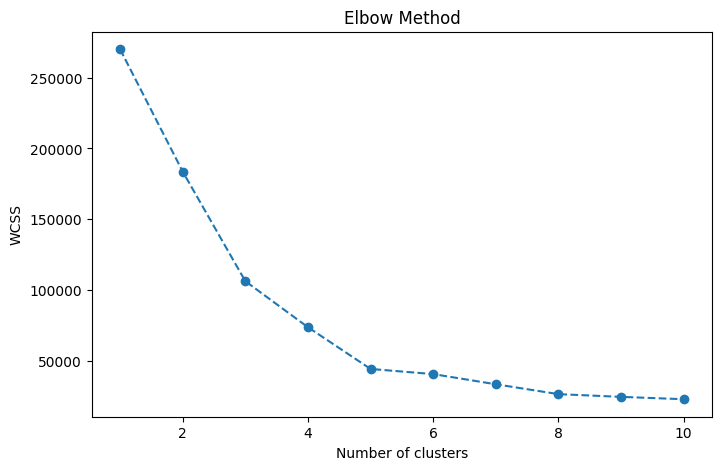

In [18]:
# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
# Apply K-Means with chosen clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

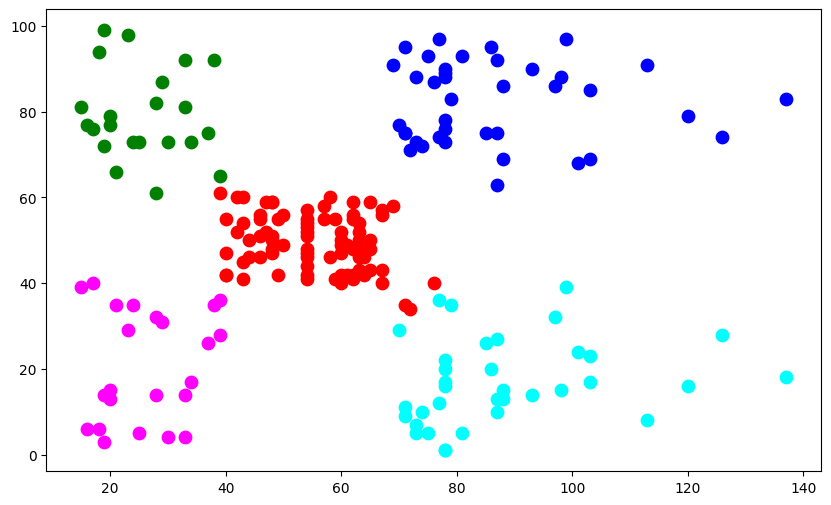

In [20]:
# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1 - Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='blue', label='Cluster 2 - Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, c='green', label='Cluster 3 - Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, c='cyan', label='Cluster 4 - Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, c='magenta', label='Cluster 5 - Sensible')

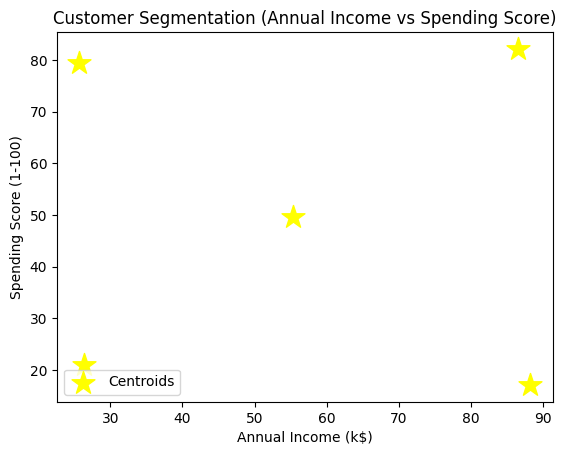

In [21]:
# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title('Customer Segmentation (Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()